#### Setting the environment variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('float_format', '{:.4f}'.format)
pd.options.display.max_colwidth = 100
%matplotlib inline
plt.rcParams['font.size'] = '14'

# Ecommerce Churn Assignment

The aim of the assignment is to build a model that predicts whether a person purchases an item after it has been added to the cart or not. Being a classification problem, you are expected to use your understanding of all the three models covered till now. You must select the most robust model and provide a solution that predicts the churn in the most suitable manner. 

For this assignment, you are provided the data associated with an e-commerce company for the month of October 2019. Your task is to first analyse the data, and then perform multiple steps towards the model building process.

The broad tasks are:
- Data Exploration
- Feature Engineering
- Model Selection
- Model Inference

### Data description

The dataset stores the information of a customer session on the e-commerce platform. It records the activity and the associated parameters with it.

- **event_time**: Date and time when user accesses the platform
- **event_type**: Action performed by the customer
            - View
            - Cart
            - Purchase
            - Remove from cart
- **product_id**: Unique number to identify the product in the event
- **category_id**: Unique number to identify the category of the product
- **category_code**: Stores primary and secondary categories of the product
- **brand**: Brand associated with the product
- **price**: Price of the product
- **user_id**: Unique ID for a customer
- **user_session**: Session ID for a user


### Initialising the SparkSession

The dataset provided is 5 GBs in size. Therefore, it is expected that you increase the driver memory to a greater number. You can refer to notebook 1 for the steps involved here.

In [2]:
# Loading the clean data

# This part is not required

<hr>

## Task 4: Model Inference

- Feature Importance
- Model Inference
- Feature exploration

### Feature Importance and Feature Exploration

In [3]:
# Retrieving the Feature Importance metrics from earlier models

dtFeatureImp = pd.read_csv('decisionTreeFeatureImp.csv')
display(dtFeatureImp.head(5))

rfFeatureImp = pd.read_csv('randomForestFeatureImp.csv')
display(rfFeatureImp.head(5))

,Unnamed: 0,idx,name,score
0,5,103,user_sessions_count,0.1235
1,2,100,product_count_for_user,0.1071
2,3,101,sub_category_count_for_user,0.1069
3,0,98,price,0.1055
4,1,99,user_session_activity_count,0.0913


,Unnamed: 0,idx,name,score
0,1,99,user_session_activity_count,0.1173
1,2,100,product_count_for_user,0.1097
2,0,98,price,0.0624
3,3,101,sub_category_count_for_user,0.0609
4,4,102,avg_expense_for_sub_category,0.0608


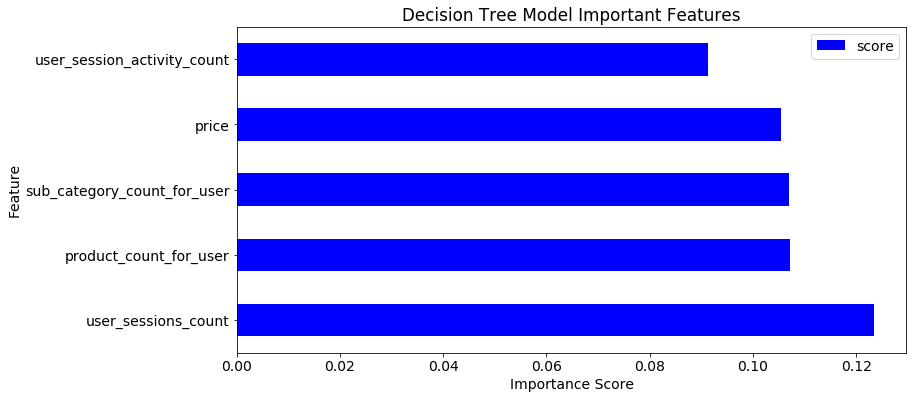

In [4]:
# Plotting the DecisionTree Feature Importance metrics

dtFeatureImp.head(5).plot(x='name', y='score', kind='barh', color='blue', figsize=(12,6))
plt.title('Decision Tree Model Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

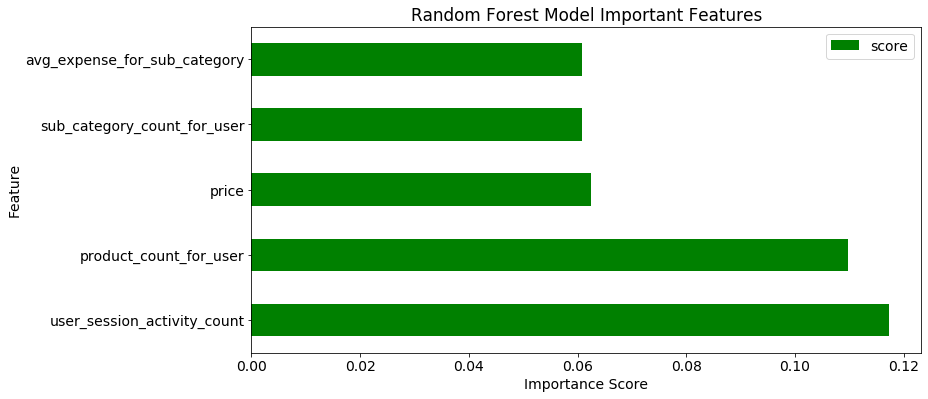

In [5]:
# Plotting the RandomForest Feature Importance metrics

rfFeatureImp.head(5).plot(x='name', y='score', kind='barh', color='green', figsize=(12,6))
plt.title('Random Forest Model Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

__*Based on the Important Features as learnt by the DecisionTree and RandomForest models, the recommendations for the E-commerce company would be :*__

1. Explore marketing campaigns to drive traffic to the platform in order to increase the 'user_sessions_count' and 'user_session_activity_count' derived feature numbers
2. As indicated by the 'sub_category_count_for_user' and 'avg_expense_for_sub_category' derived features, display similar products belonging to the same sub_category and price range based on the user cart activity to increase the probability of purchase
3. Based on the 'product_count_for_user' and 'price' features, consider offering spot discounts for specific products when the view counts within the user session exceed certain configurable thresholds

### Model Inference

In [6]:
# Retrieving and combining the performance evaluation metrics from earlier models

logisticRegressionMetrics_df = pd.read_csv('logisticRegressionMetrics.csv')
decisionTreeMetrics_df = pd.read_csv('decisionTreeMetrics.csv')
randomForestMetrics_df = pd.read_csv('randomForestMetrics.csv')
all_models_df = pd.concat([logisticRegressionMetrics_df, decisionTreeMetrics_df, randomForestMetrics_df])
all_models_df.drop(['Unnamed: 0'], axis=1, inplace=True)
all_models_df

,ModelType,Accuracy,Precision,Recall,F1_score,AreaUnderROC
0,LogisticRegression,0.6352,0.7335,0.7328,0.7331,0.6340
0,DecisionTree,0.8785,0.8791,0.8785,0.8788,0.7396
0,RandomForest,0.7175,0.7223,0.7175,0.7199,0.7299


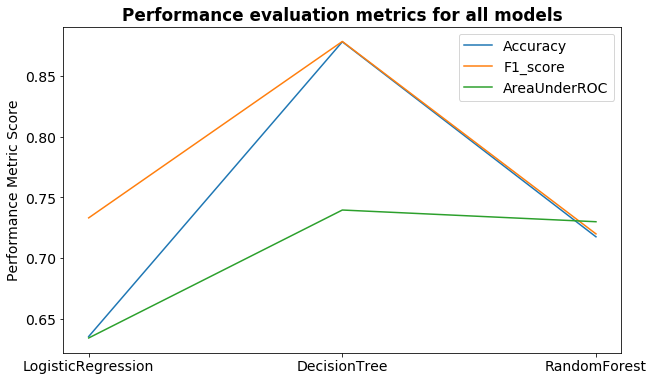

In [7]:
# Plotting the performance evaluation metrics together for all models

plt.figure(figsize=(10,6))
plt.title(label='Performance evaluation metrics for all models', fontdict=dict(fontweight='bold'))
plt.plot('ModelType', 'Accuracy', data=all_models_df)
#plt.plot('ModelType', 'Precision', data=all_models_df)
#plt.plot('ModelType', 'Recall', data=all_models_df)
plt.plot('ModelType', 'F1_score', data=all_models_df)
plt.plot('ModelType', 'AreaUnderROC', data=all_models_df)
#plt.legend(['Accuracy', 'Precision', 'Recall', 'F1_score', 'AreaUnderROC'])
plt.legend(['Accuracy', 'F1_score', 'AreaUnderROC'])
#plt.xlabel('')
plt.ylabel('Performance Metric Score')
plt.show()

__*The performance metrics - Accuracy, F1_score (derived from Precision & Recall scores), AreaUnderROC - are plotted together for all the models. We can see that DecisionTree scores the highest across all metrics, with RandomForest coming very close on the AreaUnderROC metric.<br><br>Accordingly, the recommended model for this exercise would still be RandomForest for unseen data due to a lower risk of overfitting based on its ensemble learning approach.*__